# EXPLORE REGIONS

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal

region_df=pd.read_csv("../data/wide_daily_scaledPer10k.csv")
region_df.index=pd.to_datetime(region_df['Date'])
region_df.drop(columns=['Date'], inplace=True)

Text(0.5, 1.0, 'Daily Trolleys per 10,000 Residents by Region')

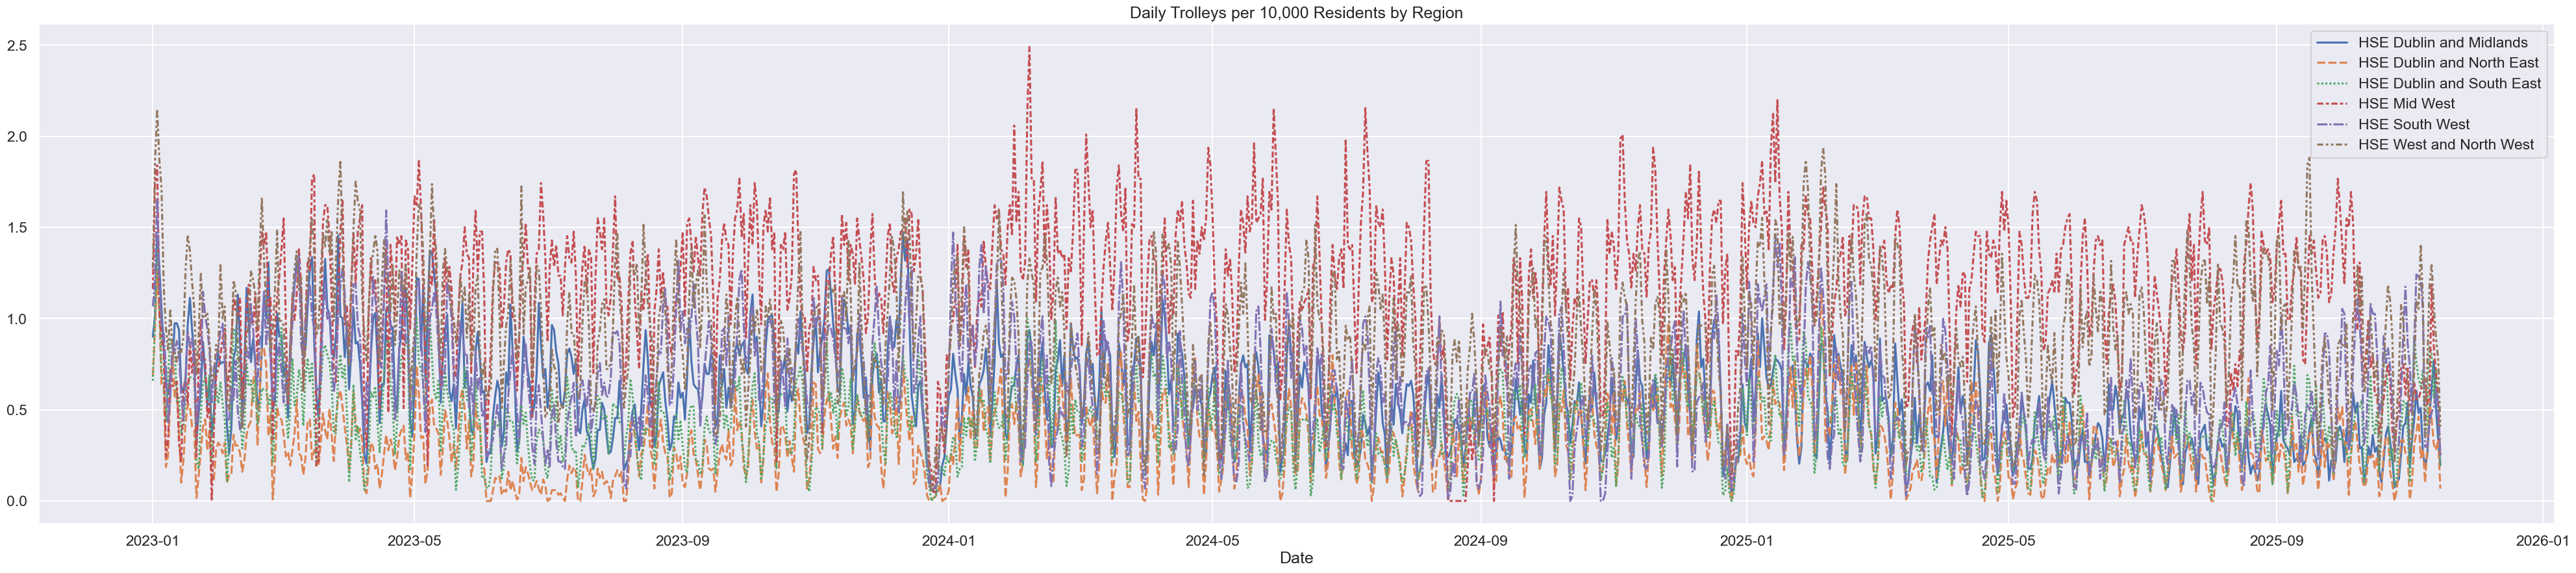

In [4]:
sns.set_theme(context="talk")    
plt.figure(figsize=(50,10))
sns.lineplot(data=region_df)
plt.title("Daily Trolleys per 10,000 Residents by Region")

## Weekend effects
Plotting mean for each weekday

In [5]:
region_df

,HSE Dublin and Midlands,HSE Dublin and North East,HSE Dublin and South East,HSE Mid West,HSE South West,HSE West and North West
Date,,,,,,
2023-01-01,0.900116,0.682345,0.659051,1.162062,1.066683,1.276900
2023-01-02,1.020750,0.951914,1.009172,1.743092,1.215208,1.856113
2023-01-03,1.456889,1.263603,1.390186,1.839931,1.660784,2.145719
2023-01-04,1.280577,1.036154,1.122447,1.041014,1.215208,1.869277
2023-01-05,1.048589,0.631801,0.700242,0.895756,0.972166,1.711310
...,...,...,...,...,...,...
2025-11-11,0.621730,0.446473,0.813516,1.186271,0.486083,1.303228
2025-11-12,0.770202,0.311689,0.566372,0.847337,0.513088,1.066278
2025-11-13,0.510375,0.277993,0.720837,0.702079,0.607604,0.895147


/var/folders/8p/bnwtr4b93fn3_th1x9ysmwy00000gn/T/ipykernel_27960/4052770152.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  .set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])


Text(0, 0.5, 'Mean Trolleys per 10,000 Residents')

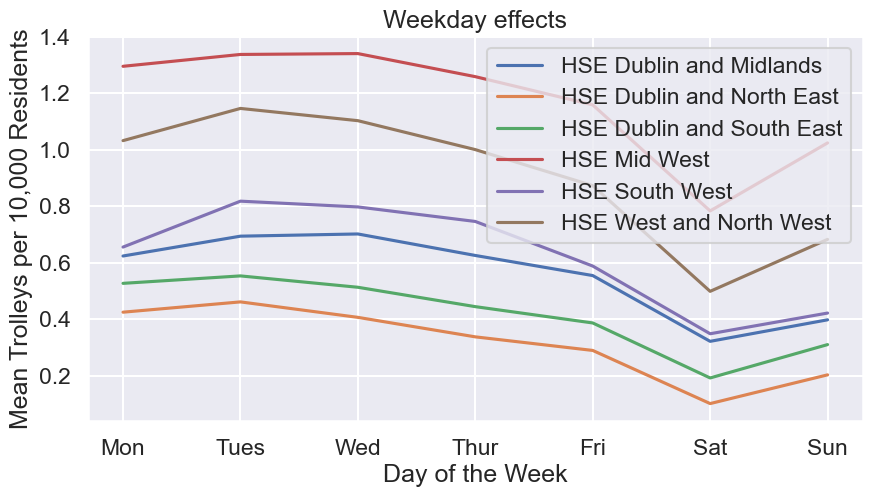

In [6]:
# Add weekdays to df
region_df['weekday']= region_df.index.dayofweek
# Plot
region_df.groupby(["weekday"]).mean().plot(figsize=(10,5), grid=True, legend=True, title="Weekday effects")\
    .set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Mean Trolleys per 10,000 Residents")

## Autocorrelation 

In [7]:
# remove weekday column for autocorr
wo_weekday_region_df =region_df.drop(columns=['weekday'])

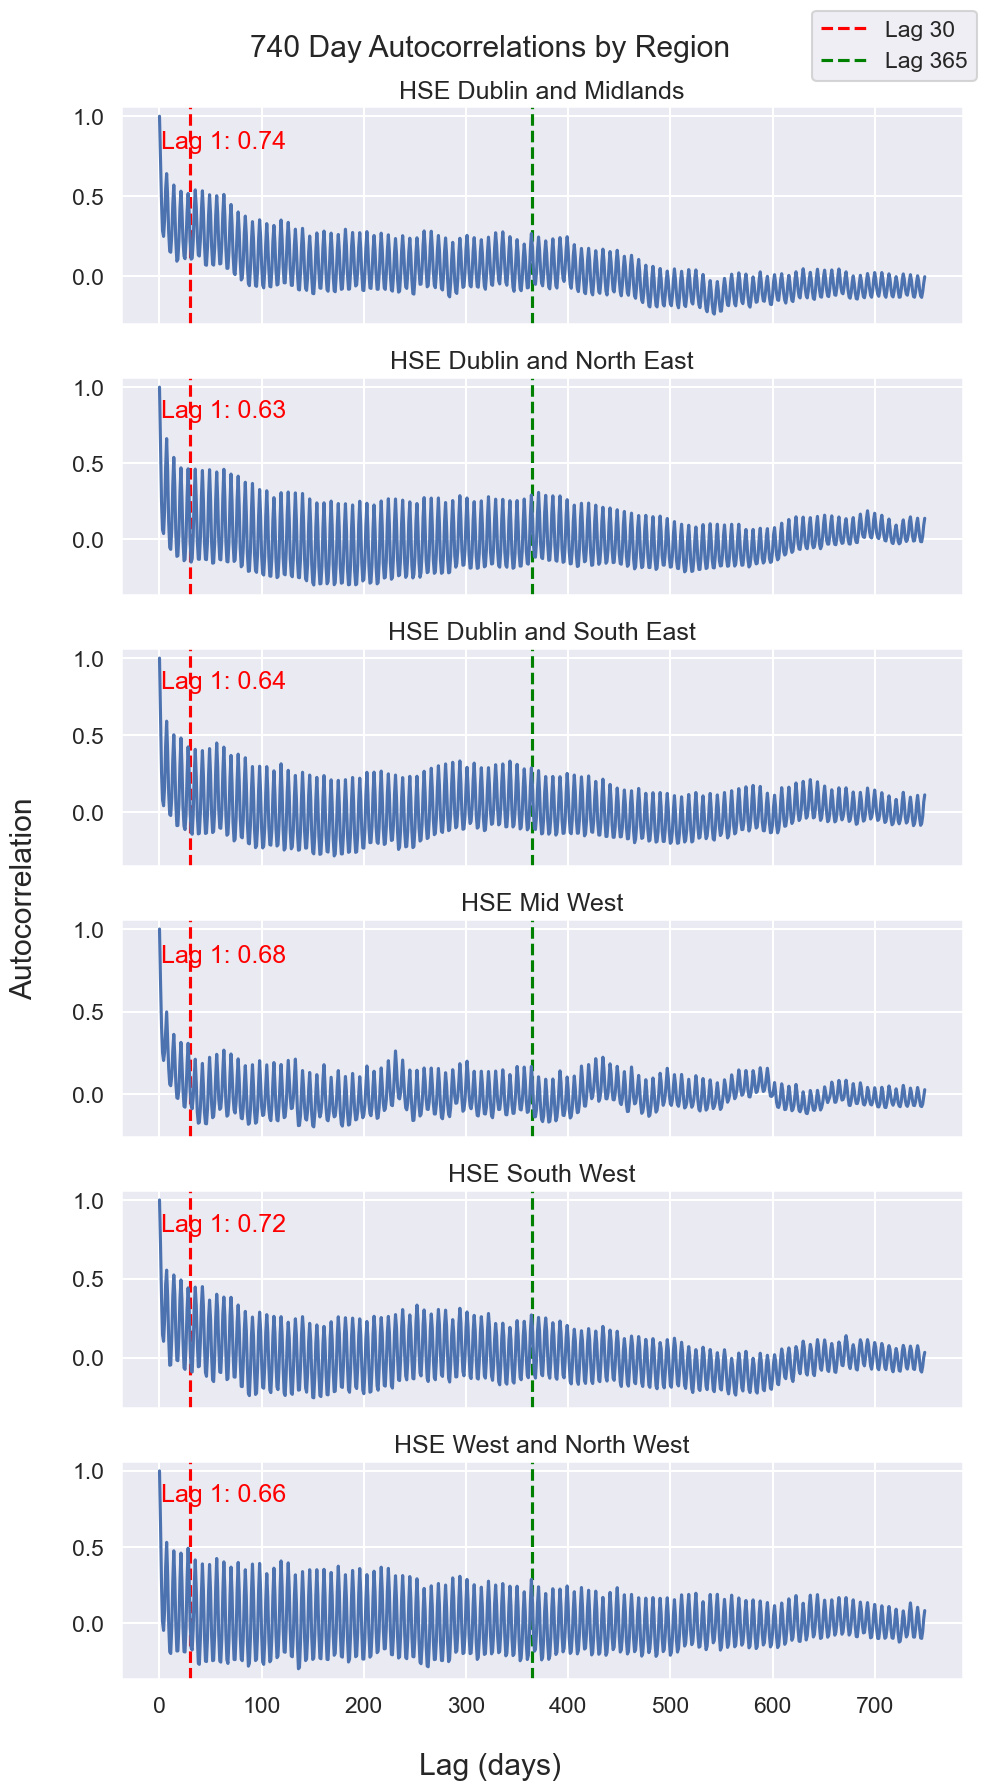

In [8]:
# do autocorr
# each lag is a day so ~50 days is ~2 months
maxlags=750
numeric_cols = wo_weekday_region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)),sharex=True)

for ax, col in zip(axes, numeric_cols):
    x = wo_weekday_region_df[col].dropna().values
    x = x - x.mean()
    # do auto correlation
    acf = signal.correlate(x, x, mode='full')
    # get just positive half (this function will get negative correlations)
    acf = acf[len(acf)//2:len(acf)//2+maxlags]  
    acf = acf / acf[0]       # lag 0 which should be the max

    # plot lag 1 line and annotate
    ax.axvline(x=30, color='red', linestyle='--')  # Add vertical line at lag 1
    ax.text(1.5, 0.8, f'Lag 1: {acf[1]:.2f}', color='red')  # Annotate lag 1 value

    # plot 1 week line
    ax.axvline(x=365, color='green', linestyle='--')  # Add vertical line at lag 1
    ax.plot(acf)  # First 50 lags
    ax.set_title(f'{col}')
    ax.grid(True)
fig.suptitle('740 Day Autocorrelations by Region')
fig.supxlabel('Lag (days)')
fig.supylabel('Autocorrelation')
fig.legend(labels=['Lag 30', 'Lag 365'], loc='upper right')
plt.tight_layout()


Autocorrelation first month 

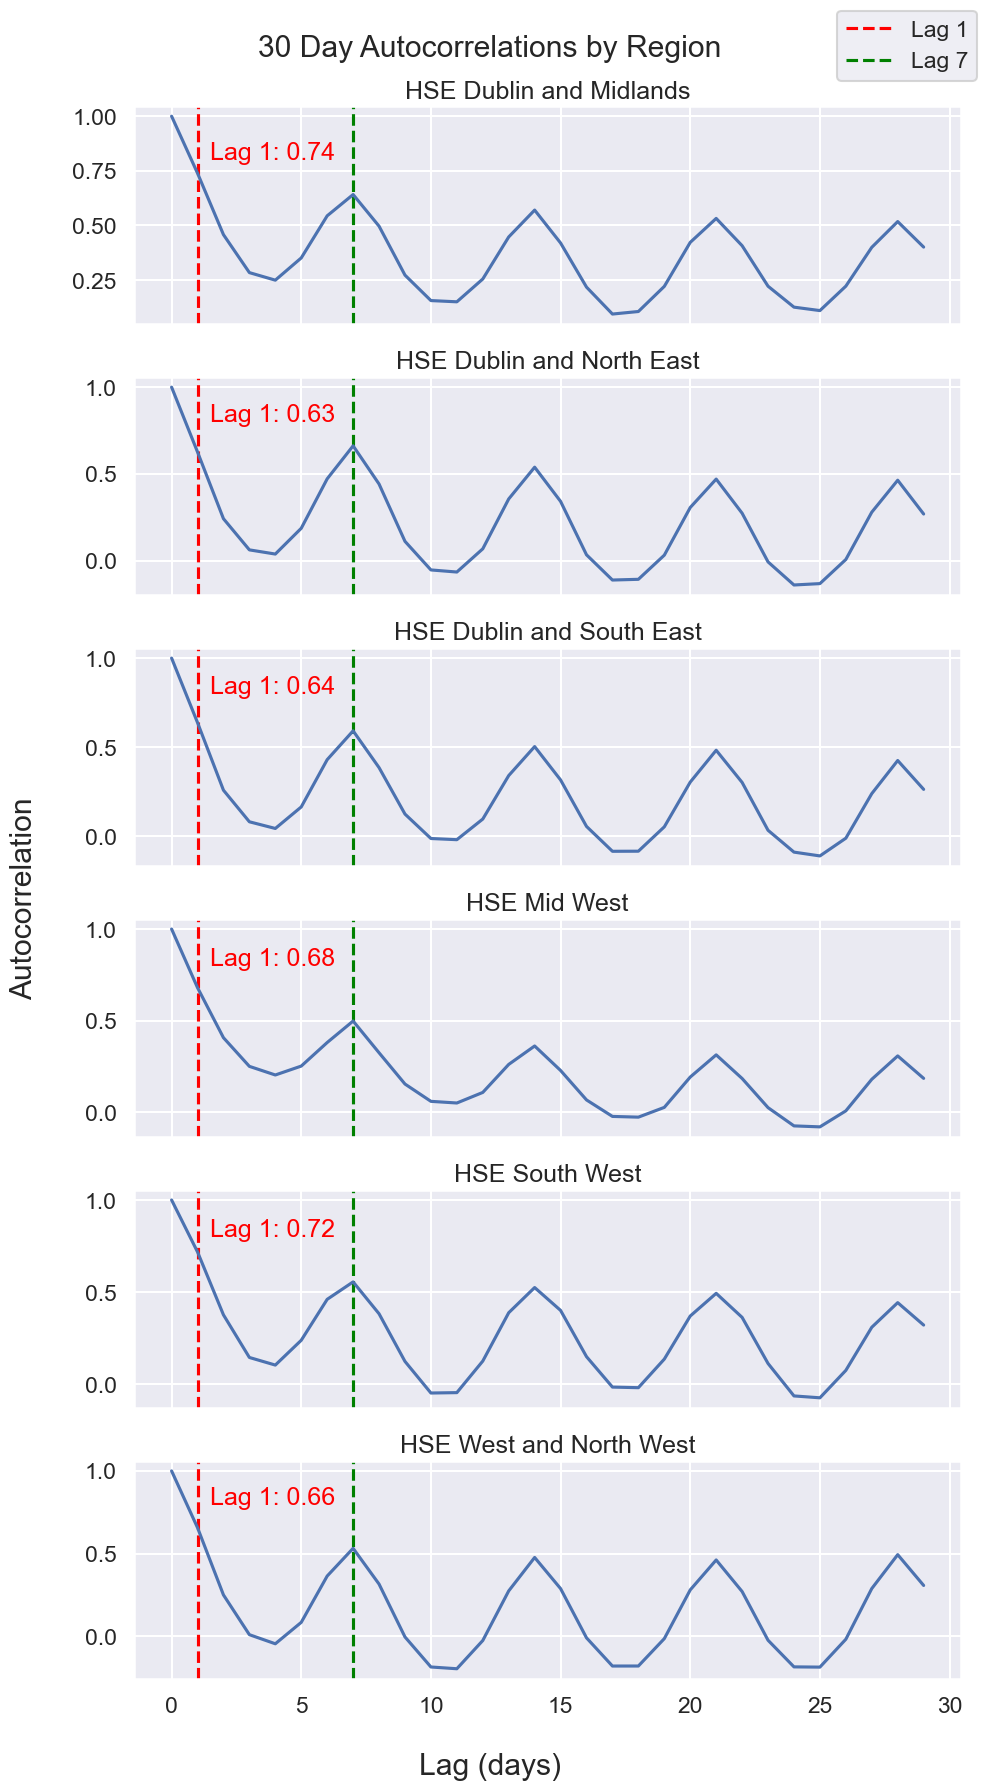

In [9]:
# do autocorr
# each lag is a day
maxlags=30
numeric_cols = wo_weekday_region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)),sharex=True)

for ax, col in zip(axes, numeric_cols):
    x = wo_weekday_region_df[col].dropna().values
    x = x - x.mean()
    # do auto correlation
    acf = signal.correlate(x, x, mode='full')
    # get just positive half (this function will get negative correlations)
    acf = acf[len(acf)//2:len(acf)//2+maxlags]  
    acf = acf / acf[0]       # normalize to lag 0

    # plot lag 1 line and annotate
    ax.axvline(x=1, color='red', linestyle='--')  # Add vertical line at lag 1
    ax.text(1.5, 0.8, f'Lag 1: {acf[1]:.2f}', color='red')  # Annotate lag 1 value

    # plot 1 week line
    ax.axvline(x=7, color='green', linestyle='--')  # Add vertical line at lag 1

    ax.plot(acf)  # plot first maxlags lags
    ax.set_title(f'{col}')
fig.legend(labels=['Lag 1', 'Lag 7'], loc='upper right')
fig.suptitle('30 Day Autocorrelations by Region')
fig.supxlabel('Lag (days)')
fig.supylabel('Autocorrelation')
plt.tight_layout()

In [10]:
# Histogram
# numeric_cols = wo_weekday_region_df.select_dtypes(include='number').columns
# fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3*len(numeric_cols)))

# for ax, col in zip(axes, numeric_cols):
#     x = wo_weekday_region_df[col].dropna().values

#     # ax.hist(x, bins=50)  # First 50 lags
#     ax.hist(x, bins=50)
#     ax.set_title(f'{col}')
#     # ax.set_xlabel('Daily')
#     # ax.set_ylabel('Count')
#     ax.grid(True)

# plt.tight_layout()
# plt.show()

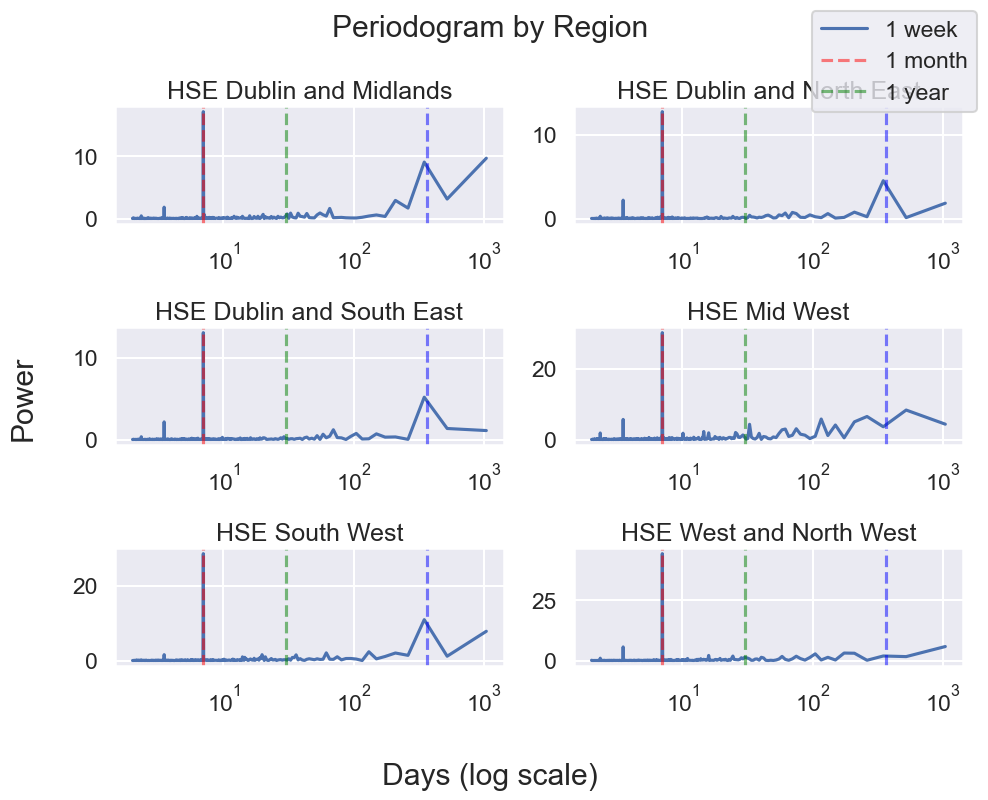

In [16]:
# just to plot every psd
from scipy.signal import periodogram
numeric_cols = wo_weekday_region_df.select_dtypes(include='number').columns
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

fs=1# for daily sampling

for ax, col in zip(axes.flatten(), numeric_cols):
    x = wo_weekday_region_df[col].dropna().values
    x = x - x.mean()

    # Compute PSD
    # freqs, psd = welch(x, fs=fs, nperseg=400)

    freqs, psd = periodogram(x, fs=1.0)

    # Convert to periods (days)
    periods = 1 / freqs[1:]
    psd = psd[1:]

    ax.plot(periods, psd)
    ax.set_title(f'{col}')
    ax.set_xscale('log')
    ax.grid(True)

    # Mark common periods
    for period, color in zip([7, 30, 365], ['red','green','blue']):
        if period < periods.max():
            ax.axvline(period, color=color, linestyle='--', alpha=0.5)


fig.legend(labels=['1 week', '1 month', '1 year'], loc='upper right')
fig.suptitle('Periodogram by Region')
fig.supxlabel('Days (log scale)')
fig.supylabel('Power')
plt.tight_layout()
